# "Practical Project in Deep Learning: CIFAR-10 Classification"
> "Image Classification using CNN"

- toc:true
- branch: master
- badges: true
- comments: true
- categories: [Deep Learning, tensorflow, Keras, Real life Study, CIFAR10]

# Project Overview

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
 -- Airplanes, Cars, Birds, Cats, Deer, Dogs, Frogs, Horses, Ships, Trucks
- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images, 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html
- **Objective**: The objective is to classify the images as per their classes mentioned above.


In [1]:
#collapse
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets
import warnings
warnings.filterwarnings('ignore')
gpus= tf.config.experimental.list_physical_devices('GPU') #These above two lines are added while importing libraries as I am training the model on GPU and I am getting a CUDNN error while compiling the model.
tf.config.experimental.set_memory_growth(gpus[0], True)   #After searching for the solution I found that either I need to update my tensorflow or I need to add these two lines in the code.

In [2]:
#collapse_show
#reading  the data
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()

In [3]:
#collapse_show
#checking data shape
X_train.shape, X_test.shape, y_test.shape, y_train.shape


((50000, 32, 32, 3), (10000, 32, 32, 3), (10000, 1), (50000, 1))

# Data Visualization

array([7], dtype=uint8)

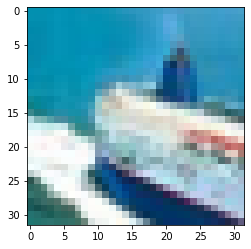

In [4]:
#collapse_show
#visualizing a single image

index=1822
plt.imshow(X_train[index])
y_test[index]


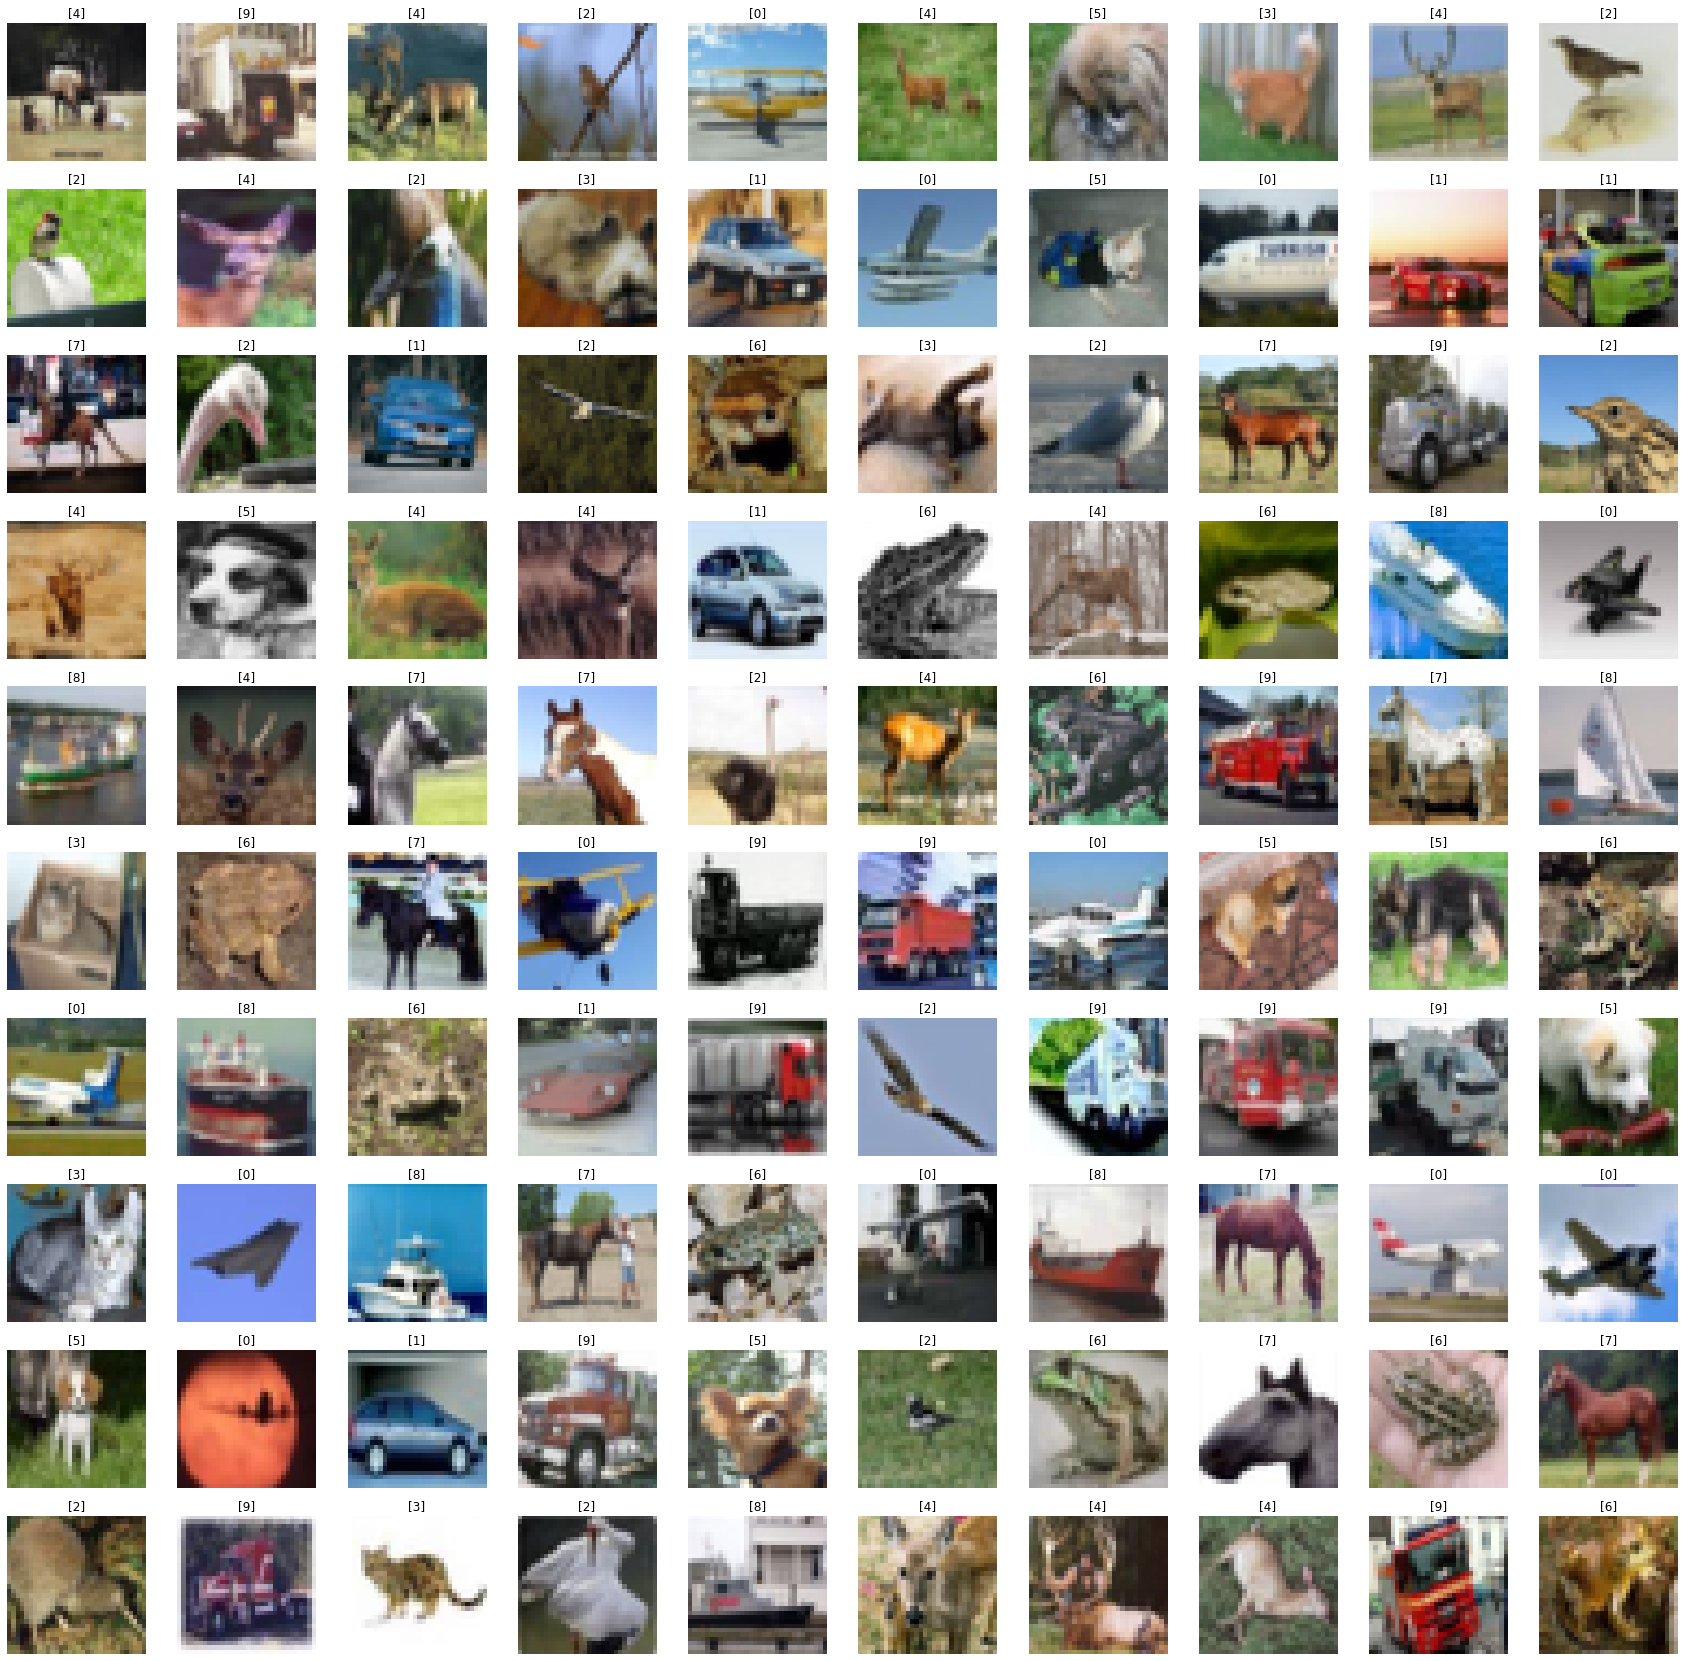

In [5]:
#collapse_show
# Defining the grid
L_grid=10
W_grid=10

# Maplotlib sub plot creation

fig, axes = plt.subplots(L_grid, W_grid, figsize=(30,30))
axes=axes.ravel()

for i in range(0,L_grid*W_grid):
    ind=np.random.randint(len(X_train))
    axes[i].imshow(X_train[ind])
    axes[i].set_title(y_train[ind])
    axes[i].axis('off')
    


# Data Preprocessing

In [6]:
#collapse_show
# Converting the X_train and X_test matric values to float32

X_train= X_train.astype('float32')
X_test=X_test.astype('float32')

In [7]:
#collapse_show
# Since y_train and y_test are an integer values having class number 0-9. we convert it into categorical values
# Importing module for this purpose
from tensorflow import keras

y_train=keras.utils.to_categorical(y_train, 10)
y_test=keras.utils.to_categorical(y_test,10)


In [8]:
#collapse_show
#Checking the value of y_train

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Question**
To normalize why do we divide by 255?

RGB (Red, Green, Blue) are 8 bit each.
The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
The combination range is 256*256*256.

By dividing by 255, the 0-255 range can be described with a 0.0-1.0 range where 0.0 means 0 (0x00) and 1.0 means 255 

In [9]:
#collapse_show
# Normalize the data
#Flatten the shape of the image( To enable this just divide by 255)

X_train=X_train/255
X_test=X_test/255

In [10]:
#collapse_show
#Checking the input shape

input_shape=X_train.shape[1:]
print('the input shape is', input_shape)

the input shape is (32, 32, 3)


# Model Building

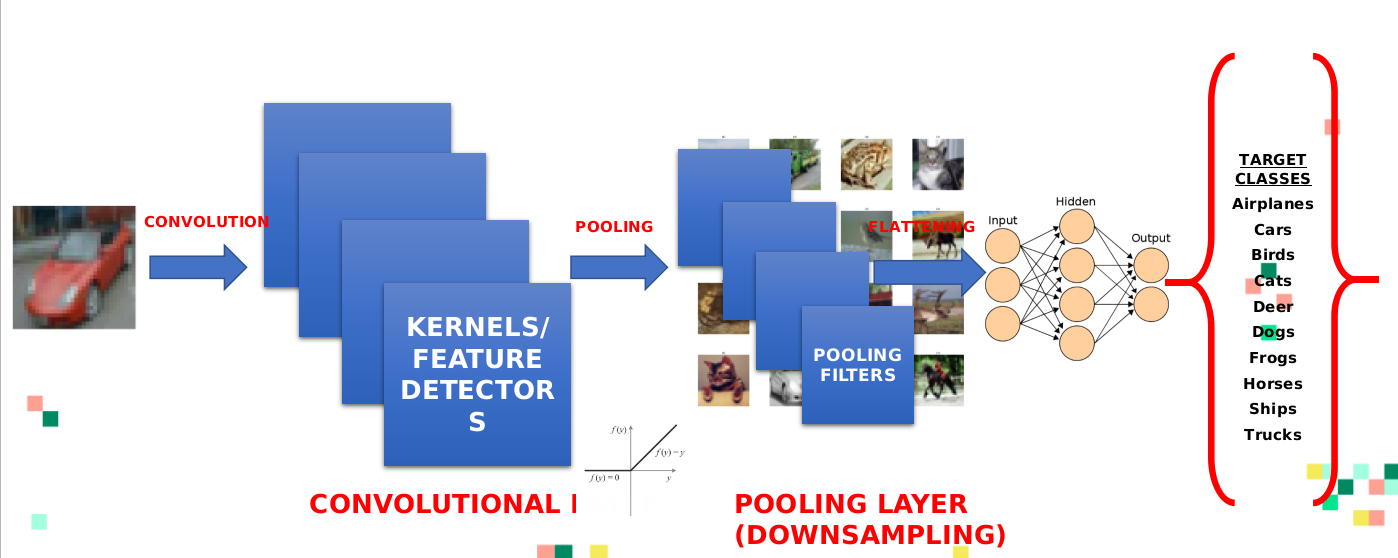

In [11]:
#collapse_show
#importing libraries to build the model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense,Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard


In [12]:
#collapse_show
#We start to build the layers one by one
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=input_shape))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(rate=0.3))

#Adding another 2 Cnn layers

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(rate=0.2))

#Adding a flatten layer

cnn_model.add(Flatten())

#Adding two Dense layers (Fully connected layer)

cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=512, activation='relu'))

#creating the final output layer of the network

cnn_model.add(Dense(units=10,activation='softmax'))   # Units are equal to 10 as the output categories are 10


**Question**: Why enable dropout?

- Improve accuracy by adding more feature detectors/filters or adding a dropout. 
- Dropout refers to dropping out units in a neural network.
- Neurons develop co-dependency amongst each other during training
- Dropout is a regularization technique for reducing overfitting in neural networks. 
- It enables training to occur on several architectures of the neural network


In [13]:
#collapse_show
# Compiling the model

cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

# Running the model

history=cnn_model.fit(X_train,y_train,epochs=13,batch_size=32, shuffle=True)

Epoch 1/13
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5618 - accuracy: 0.4350
Epoch 2/13
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1556 - accuracy: 0.5974
Epoch 3/13
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0335 - accuracy: 0.6469
Epoch 4/13
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9929 - accuracy: 0.6648
Epoch 5/13
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9604 - accuracy: 0.6734
Epoch 6/13
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9430 - accuracy: 0.6822
Epoch 7/13
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9421 - accuracy: 0.6848
Epoch 8/13
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9320 - accuracy: 0.6911
Epoch 9/13
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9320 - accuracy: 0.6894
Epoch 10/13
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9

# Model Evaluation

In [14]:
#collapse_show
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

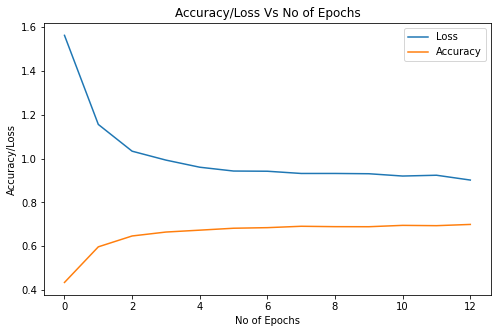

In [15]:
#collapse_show
# Plotting the loss and accurcy

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy/Loss')
plt.title('Accuracy/Loss Vs No of Epochs')
plt.legend()
plt.show()

In [16]:
#collapse_show
#Evaluating the model on the testset

evaluation=cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8721 - accuracy: 0.6968


In [17]:
print('The accuracy on the test set is: {} %'.format(evaluation[1]*100))

The accuracy on the test set is: 69.67999935150146 %


In [18]:
#collapse_show
# Showing the accurcay pictorically

# Getting the pridicted classes
predicted_classes=cnn_model.predict_classes(X_test)
y_test=y_test.argmax(1)   #Since the classes as we defined earlier are different, y_test classes were changed to match predicted classes


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


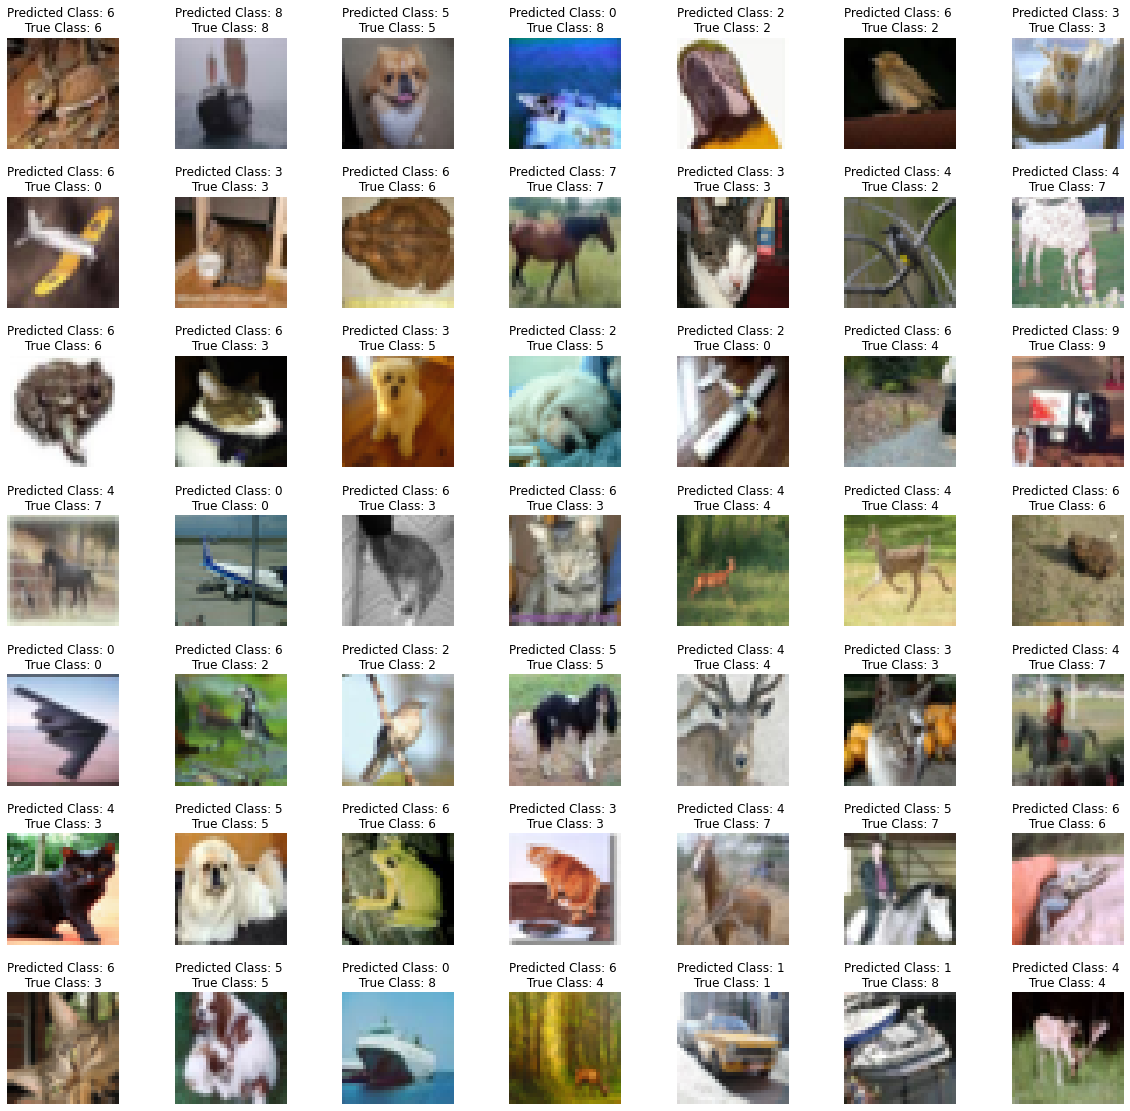

In [19]:
#collapse_show
#Plotting the pictures (Qualitative verification)

l=7
w=7
fig,axes= plt.subplots(l,w,figsize=(20,20))
axes=axes.ravel()
for i in range(l*w):
    ind=np.random.randint(len(y_test))
    axes[i].imshow(X_test[ind])
    axes[i].set_title("Predicted Class: {} \n True Class: {} ".format(predicted_classes[ind],y_test[ind]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

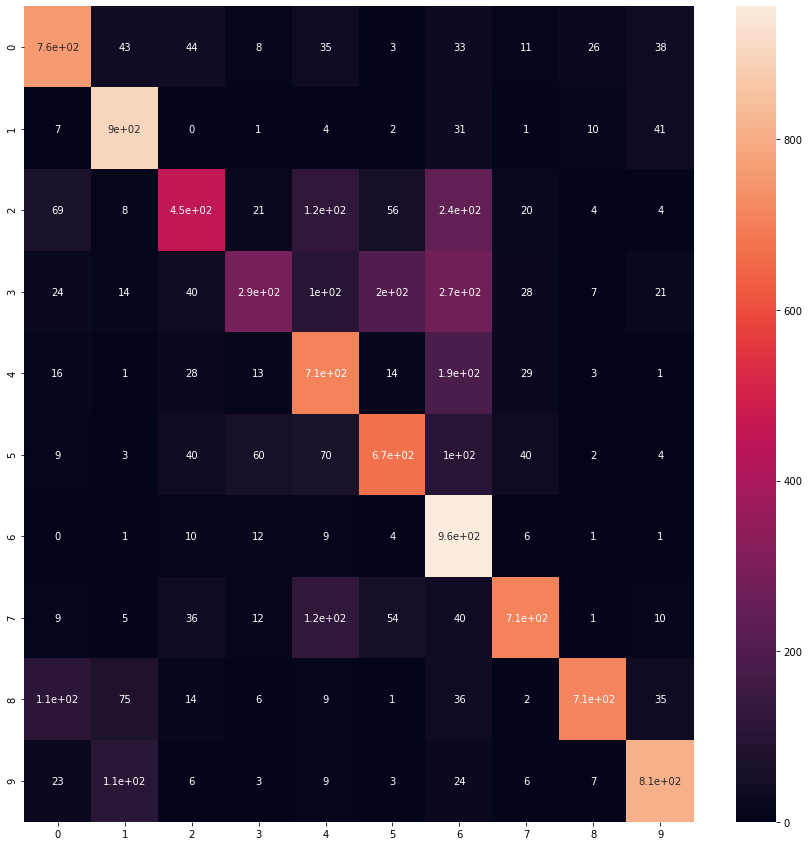

In [21]:
#collapse_show
# Quantitative Verification
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True )    # Plotting the confusion matrix # As we can see we have a lots of false negative numbers

# Confusion Matrix

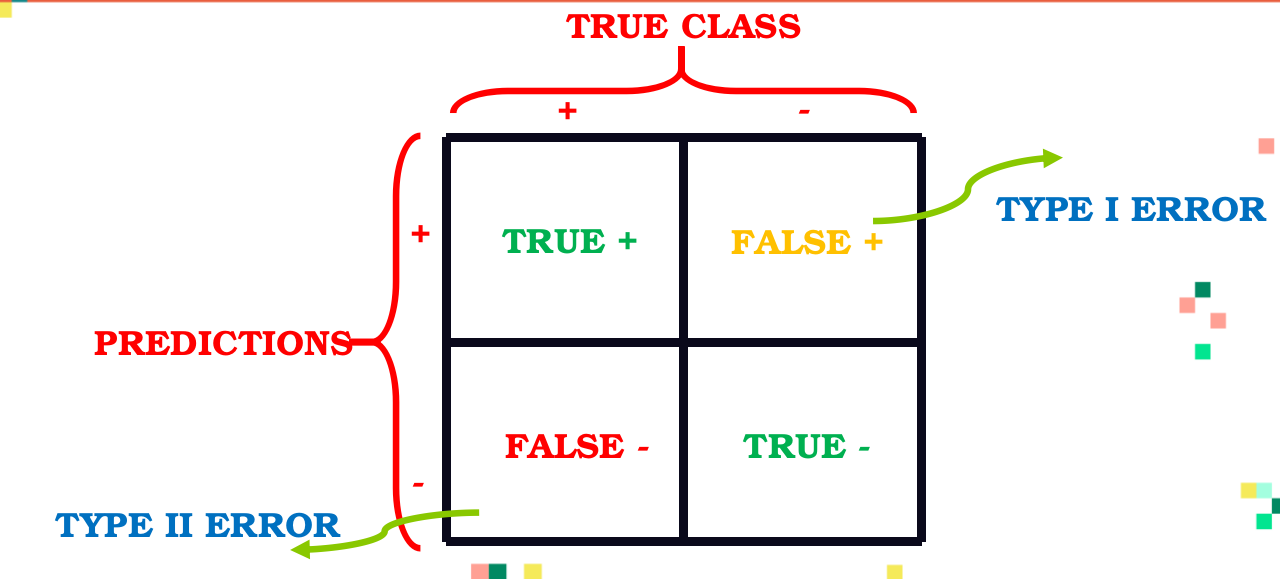

A confusion matrix is used to describe the performance of a classiﬁcation model: 

- True positives (TP): cases when classiﬁer predicted TRUE (they have the disease), and correct class was TRUE (patient has disease). 

- True negatives (TN): cases when model predicted FALSE (no disease), and correct class was FALSE (patient do not have disease). 

- False positives (FP) (Type I error): classiﬁer predicted TRUE, but correct class was FALSE (patient did not have disease). 

- False negatives (FN) (Type II error): classiﬁer predicted FALSE (patient do not have disease), but they actually do have the disease


**Some Important Terms**

Classiﬁcation Accuracy = (TP+TN) / (TP + TN + FP + FN) 

Misclassiﬁcation rate (Error Rate) = (FP + FN) / (TP + TN + FP + FN) 

Precision = TP/Total TRUE Predictions = TP/ (TP+FP) (When model predicted TRUE class, how often was it right?) 

Recall = TP/ Actual TRUE = TP/ (TP+FN) (when the class was actually TRUE, how often did the classiﬁer get it right?)


In [22]:
#collapse_show
# Using classification report

print(classification_report(y_test,predicted_classes))


              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.78      0.90      0.84      1000
           2       0.68      0.45      0.54      1000
           3       0.68      0.29      0.41      1000
           4       0.59      0.71      0.64      1000
           5       0.67      0.67      0.67      1000
           6       0.50      0.96      0.65      1000
           7       0.83      0.71      0.76      1000
           8       0.92      0.71      0.80      1000
           9       0.84      0.81      0.83      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.69     10000
weighted avg       0.72      0.70      0.69     10000

